# 코로나 데이터 시각화 AI 경진대회

## 1. 참가 정보 :

### - 참가자 : 김이삭 + 이고은 + 진형규
### - 발표일 : 2021년 3월 24일

## 2. 프로젝트 목표 : 코로나 확산 방지와 예방을 위한 인사이트(통찰력)/ 시각화 발굴

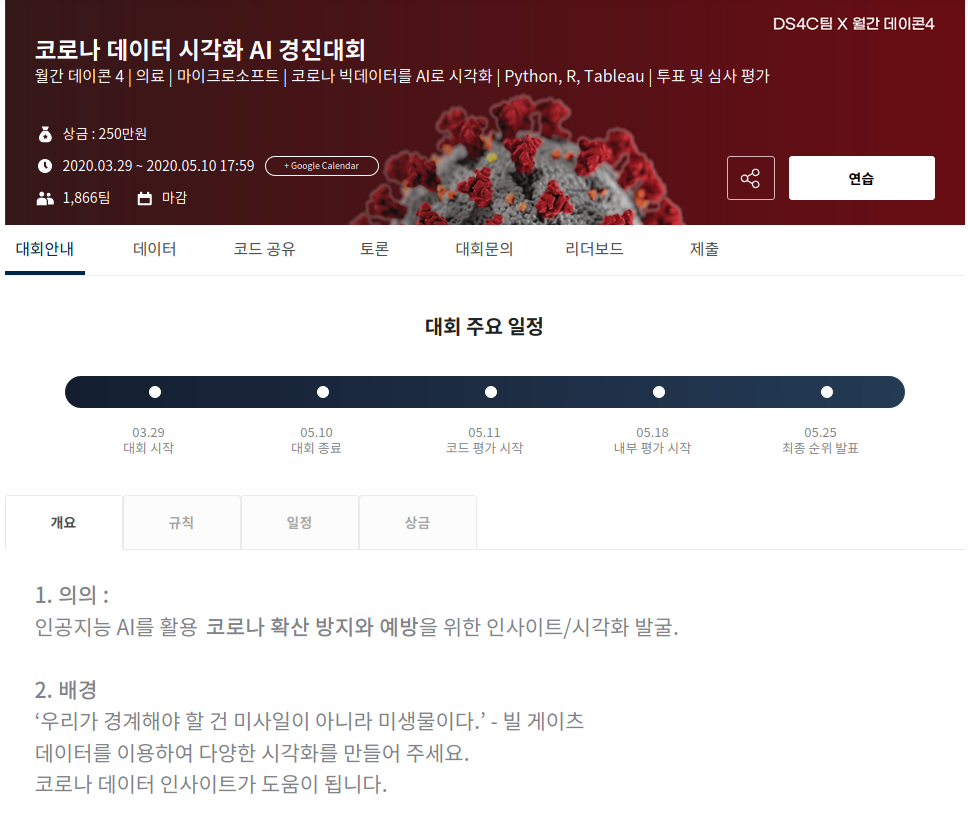

# 우리가 시각화를 통하여 전달하려고 하는 메세지 (통찰)

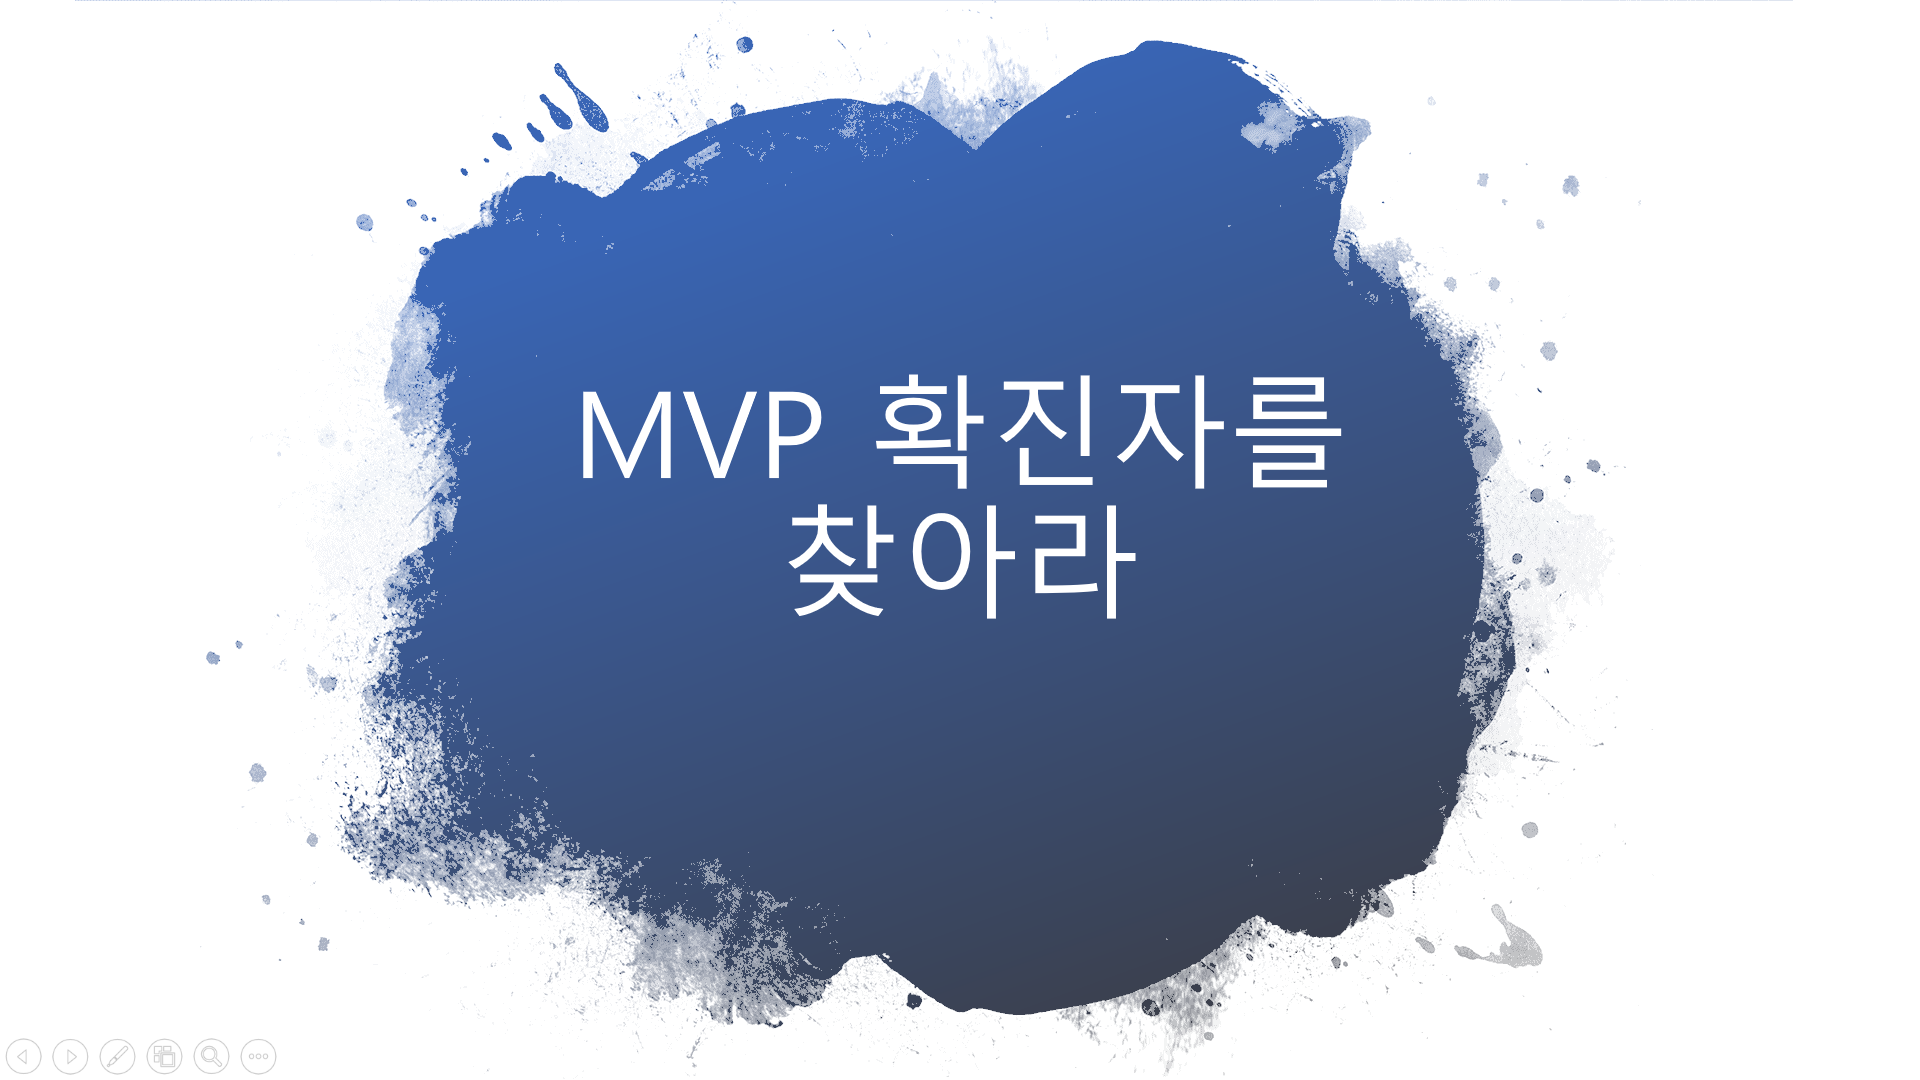

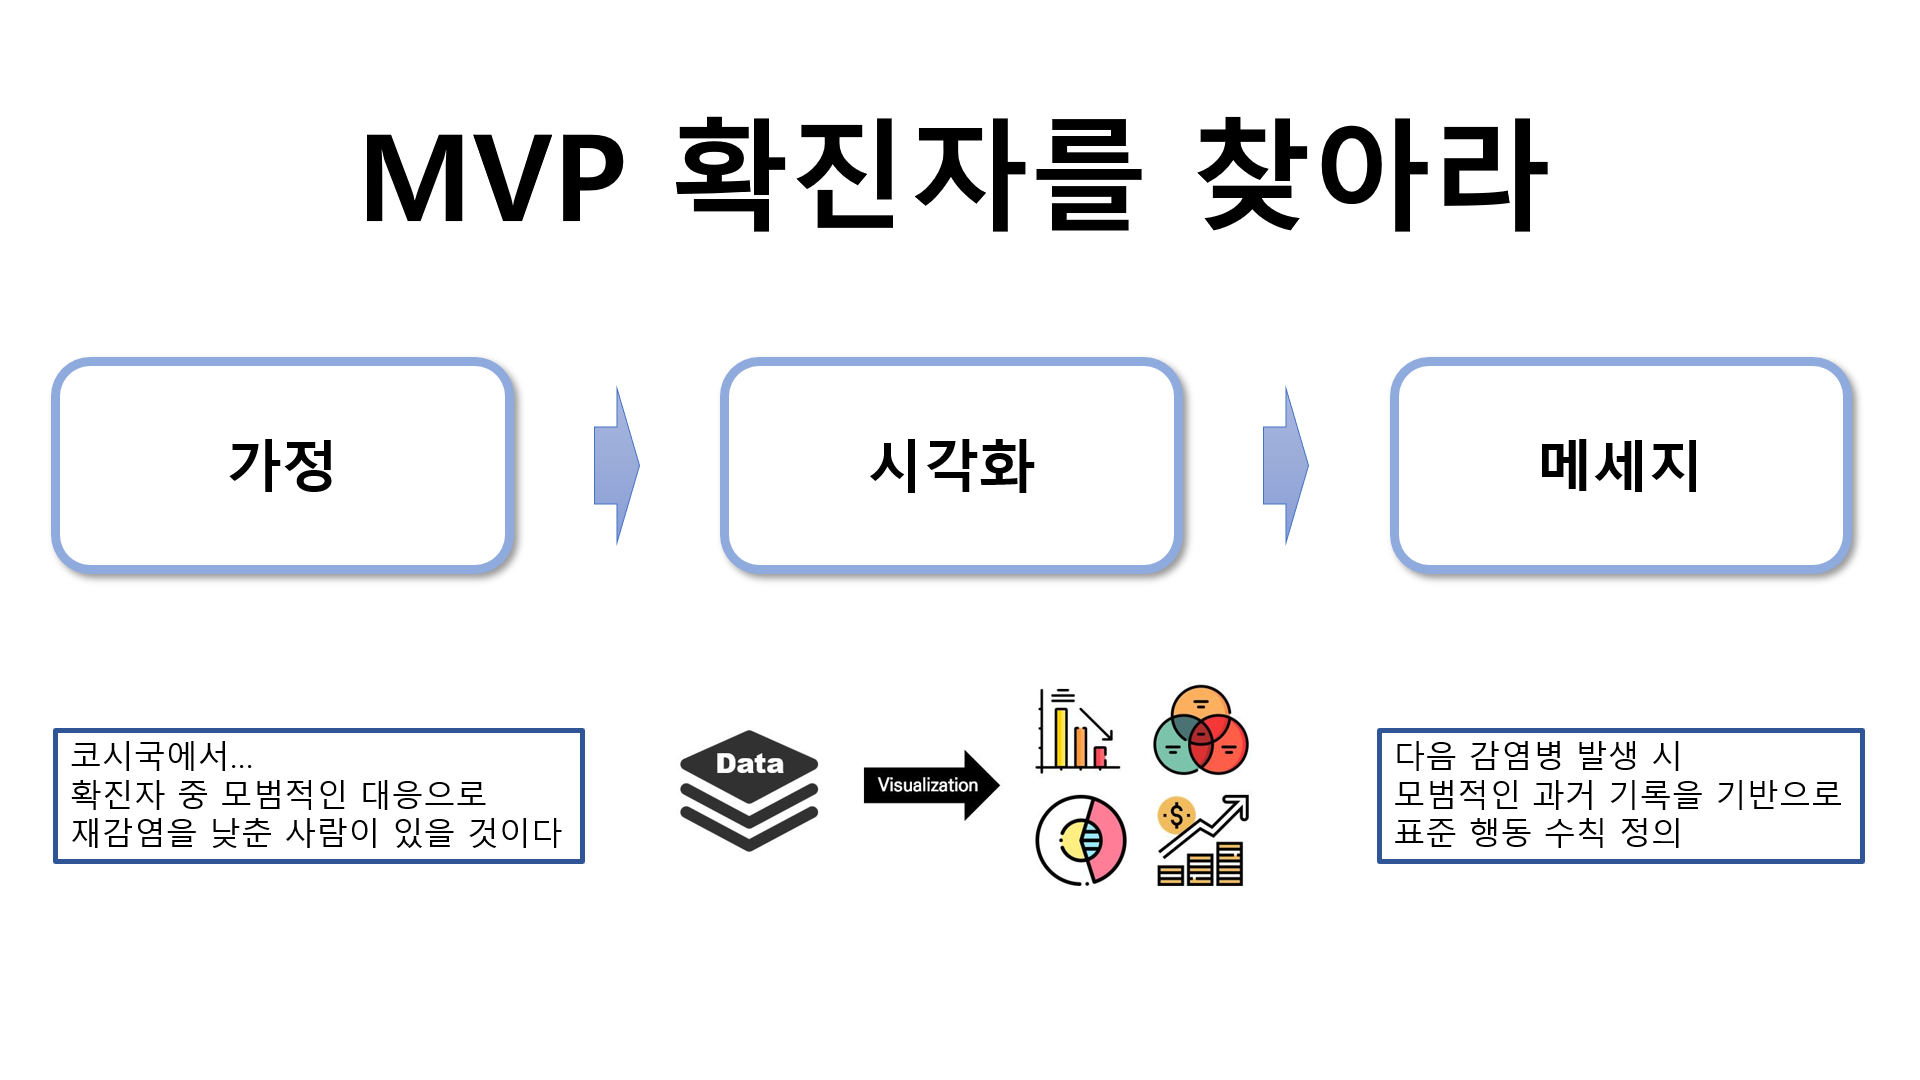

## 3. 본 프로젝트에서 전달하고자 하는 메세지

### ! MVP 확진자를 찾아라 !!

모범 확진자 기준

1. 증상이 생기고, 얼마나 빠른 시일내에 검사를 받았는가(확진일 - 증상발생일)
2. 다른 사람을 확진 시키지 않았는가
3. 감염 경로가 건전한가
4. 다른 사람과 접촉 횟수가 적은가
5. 동선이 깔끔한 사람(동선 데이터는 공개되지 않으므로, 뉴스를 찾아보자.)

스코어

50점 만점

* 확진일 - 증상발생일
    - 1일 이내 10점
    - 3일 이내 7점
    - 5일 이내 3점
    - 5일 이후 0점
* 다른 사람을 확진 시키지 않았는가
    - 0명 10점
    - 1명 이내 0점
* 감염 경로가 건전한가
    - 건전 10점
    - 애매 5점
    - 건전하지 않음 0점
* 다른 사람과 접촉 횟수가 적은가
    - 5명 이내 10점
    - 10명 이내 5점
    - 10명 이후 0점
* 동선이 깔끔한 사람
    - 미디어 평점이 좋은 사람 10점
    - 미디어 평점이 그럭저럭인 사람 5점
    - 미디어 평점이 최악인 사람 0점

## 0.필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.font_manager as fm 
fm._rebuild()

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'),
 ('NanumBarunGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothicBold.ttf'),
 ('NanumSquareRound',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundR.ttf'),
 ('NanumBarunGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf'),
 ('NanumSquareRound',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundB.ttf'),
 ('NanumMyeongjo',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjo.ttf'),
 ('NanumSquare',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquar

## 데이터 설명

### 1. The Lists of Data Table
---

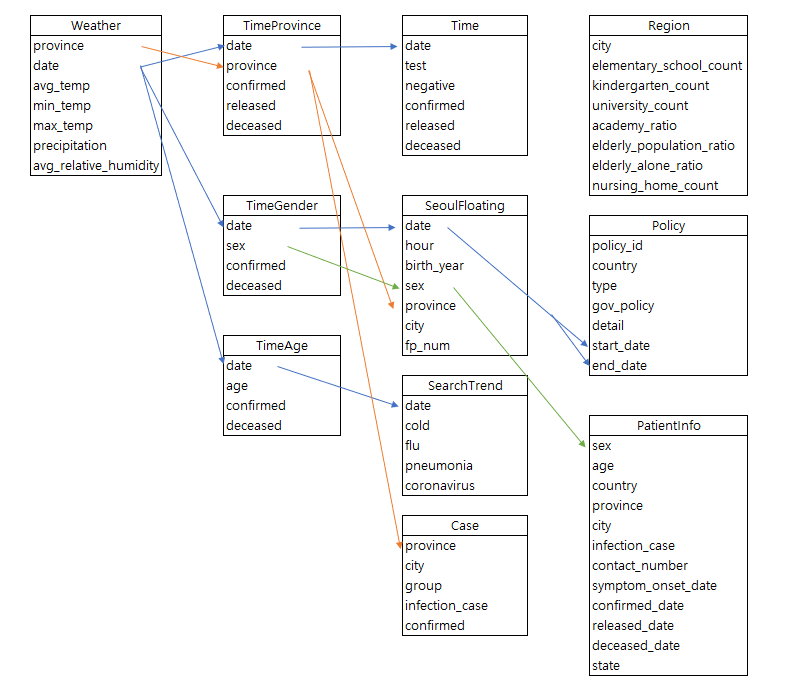

#### 0. 데이터 읽어오기

In [2]:
case = pd.read_csv("./archive/Case.csv")
pati_info = pd.read_csv("./archive/PatientInfo.csv")
policy = pd.read_csv("./archive/Policy.csv")
region = pd.read_csv("./archive/Region.csv")
search_trend = pd.read_csv("./archive/SearchTrend.csv")
seoul_floating = pd.read_csv("./archive/SeoulFloating.csv")
time = pd.read_csv("./archive/Time.csv")
time_age = pd.read_csv("./archive/TimeAge.csv")
time_gender = pd.read_csv("./archive/TimeGender.csv")
time_province = pd.read_csv("./archive/TimeProvince.csv")
weather = pd.read_csv("./archive/Weather.csv")

#### 1. Case Data
* __Case__: 대한민국의 COVID-19 감염사례 데이터
    - __case_id__: 감염사례 ID
        - case_id(7) = 지역코드(5) + 감염 번호(2)
    - __province__: 지역(특별시, 광역시, 도)
    - __city__: 도시(시, 군, 구)
    - __group__: True=집단감염, False=집단감염 아님
    - __infection_case__: 감염사례(`overseas inflow`=해외유입, `etc`=조사중
    - __confirmed__: 확진자 합계
    - __latitude__: 발생 지점 위도
    - __longitude__: 발생 지점 경도

In [ ]:
case

#### 2. Patient Data

* __PatientInfo__: 대한민국 내 COVID-19 환자의 데이터
    - __patient_id__: 환자 ID
        - patient_id(10) = 지역코드(5) + 환자 번호(5)
    - __sex__: 환자 성별
    - __age__: 환자 나이대
    - __country__: 환자 국적
    - __province__: 환자 지역(특별시, 광역시, 도)
    - __city__: 환자 도시(시, 군, 구)
    - __infection_case__: 감염 사례
    - __infected_by__: 환자를 감염시킨 사람의 ID
    - __contact_number__: 다른 사람과의 접촉 횟수
    - __symptom_onset_date__: 증상 발생일
    - __confirmed_date__: 확진일
    - __released_date__: 완치일
    - __deceased_date__: 사망일
    - __state__: 현재 상태
        - isolated(확진) / released(완치) / deceased(사망)

In [11]:
pati_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [ ]:
symptom = pati_info['symptom_onset_date']
symptom.isnull()

In [ ]:
daegu = pati_info[pati_info['province'] == 'Daegu']
daegu_male = daegu[daegu['sex'] == 'male']
daegu_male

#### 3. Time Series Data

* __Time__: 대한민국 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __test__: 검사 총합
    - __negative__: 음성 판정 총합
    - __confirmed__: 양성 판정 총합
    - __released__: 완치자 총합
    - __deceased__: 사망자 총합

In [ ]:
time

* __TimeAge__: 대한민국 연령별 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __age__: 환자의 나이대
    - __confirmed__: 연령별 확진자 총합
    - __deceased__: 연령별 사망자 총합

In [ ]:
time_age

* __TimeGender__: 대한민국 성별 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __sex__: 환자의 성별
    - __confirmed__: 성별 확진자 총합
    - __deceased__: 성별 사망자 총합

In [ ]:
time_gender

* __TimeProvince__: 대한민국 지역별 COVID-19 현황 시계열 데이터
    - __date__: YYYY-MM-DD
    - __time__: 정보공개 시각 (0 = AM 12:00 / 16 = PM 04:00)
        - 3월 2일부터 질병관리본부의 정보 공개 시간이 PM 04:00에서 AM 12:00로 변경되었다.
    - __province__: 지역(특별시, 광역시, 도)
    - __confirmed__: 지역별 확진자 총합
    - __deceased__: 지역별 사망자 총합

In [ ]:
time_province

#### 4. Additional Data

* __Region__: 대한민국 지역별 위치와 통계자료
    - __code__: 지역 코드
    - __province__: 지역(특별시, 광역시, 도)
    - __city__: 도시(시, 군, 구)
    - __latitude__: 지점 위도
    - __longitude__: 지점 경도
    - __elementary_school_count__: 초등학교 수
    - __kindergarten_count__: 유치원 수
    - __university_count__: 대학교 
    - __academy_ratio__: 학원 비율
    - __elderly_population_ratio__: 노인 인구 비율
    - __elderly_alone_ratio__: 독거 노인 비율
    - __nursing_home_count__: 양로원 수

In [ ]:
region

* __Weather__: 대한민국 지역별 기상정보
    - __code__: 지역 코드
    - __province__: 지역(특별시, 광역시, 도)
    - __date__: YYYY-MM-DD
    - __avg_temp__: 평균 기온
    - __min_temp__: 최저 기온
    - __max_temp__: 최대 기온
    - __precipitation__: 강수량
    - __max_wind_speed__: 최대 풍속
    - __most_wind_direction__: 많이 분 바람의 방향
    - __avg_relative_humidity__: 평균 상대습도

In [ ]:
weather

* __SearchTrend__: `cold` `flu` `pneumonia` `coronavirus` 의 검색어 추이 (네이버)
    - __date__: YYYY-MM-DD
    - __cold__: 감기의 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.
    - __flu__: 독감의 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.
    - __pneumonia__: 폐렴의 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.
    - __coronavirus__: 코로나바이러스 검색량
        - 기간 내 가장 높은 검색 볼륨을 100으로 설정하여 상대적인 값을 의미한다.

In [ ]:
search_trend

* __policy__: 정책 데이터
    - __policy_id__: 정책 ID
    - __country__: 정책 시행 국가
    - __type__: 정책 종류
    - __gov_policy__: 정부의 정책
    - __detail__: 정책 설명
    - __start_date__: 시작 날짜
    - __end_date__: 종료 날짜

In [ ]:
policy

* __seoul_floating__: 서울시내 유동인구
    - __date__: YYYY-MM-DD
    - __hour__: 시간
        - 1시간 단위로 0-23시로 세분화.
    - __birth_year__: 나이대
        - 10세 단위로 6개 연령대(20대, 30대, 40대, 50대, 60대, 70대 이상)로 세분화
    - __sex__: 성별
    - __province__: 지역(전부 서울)
    - __city__: 도시(구)
    - __fp_num__: 유동인구수

In [ ]:
seoul_floating

In [ ]:
time

### 누적확진자, 완치자, 사망자수

In [ ]:
df_test = time.pivot_table(index='date', values=['test', 'negative', 'confirmed', 'released', 'deceased'], aggfunc=np.sum).reset_index()
df_test

In [ ]:
# plt.style.use('ggplot')
# plt.figure(figsize=(80,50), dpi=300)
# plt.xticks(rotation=90, fontsize=100)
# plt.rc('font', family = 'NanumGothic', size=30) 
# plt.title('확진자수, 완치자수, 사망자수 추이', fontsize=200) # 제목 추가
# # plt.plot(time['date'], time['test'], label = 'test') # 검사자수를 꺾은선 그래프로 표현
# plt.plot(time['date'], time['confirmed'], label = 'confirmed') # 확진자 수를 꺾은선 그래프로 표현
# plt.plot(time['date'], time['released'], label = 'released') # 완치자 수를 꺾은선 그래프로 표현
# plt.plot(time['date'], time['deceased'], label = 'deceased') # 사망자 수를 꺽은선 그래프로 표현
# plt.xlabel('date', fontsize=100)
# plt.legend(fontsize=100)
# plt.show()

1. 날씨가 추울수록 또는 건조할 수록 코로나 전파가 잘되는가? (https://www.monews.co.kr/news/articleView.html?idxno=209830)
2. 코로나는 누구에게 가장 위험할까? (https://m.health.chosun.com/svc/news_view.html?contid=2020102102119)
3. 정책의 효과는 어떨까?(특히 사회적 거리두기의 효과가 있을까? 없을까?) (https://dacon.io/codeshare/1003?page=1&dtype=recent&s_id=0)
    * level(Blue level, Yellow level, Orange level, Red level)
    * 사회적 거리두기
    * 해외입국자 2주자가격리
4. 20대 확진이 가장 많은 것의 요인은 무엇일까?(http://www.hani.co.kr/arti/society/health/930768.html)
5. 코로나 발병률, 사망률과 고령화 지역의 관계는?
6. 어떤 성별이 코로나에 취약할까?
7. 코로나 검색량이 서울 내 유동인구에 영향이 있을까?
8. 코로나 확진 판단이 늦어지면 사망 확률이 증가할까?
9. 나이가 많을 수록 완치 기간이 오래걸릴까?
10. 양로원 환자가 많은 지역이 코로나 발병률이 높은가?
11. 어린이 코로나 환자수(혹은 비율)가 많은 지역은 초등학교와 유치원이 많은가?
12. 신천지가 없었다면 코로나는 어떻게 되었을까?
13. 남자와 여자중 감염시킨 사람이 많은 집단은 어디일까?
14. 해외 유입 확진자의 위험성은 어떤가?
15. 청소년 코로나 환자수가 많은 지역은 학원들이 많은가?
16. 백신을 맞고 사망자가 늘고 있다는데, 사실일까?
17. 무증상 환자는 사망률이 높을까? (일반 환자보다 검사 받은 시간이 길 것 같아서)
18. 가장 대처를 잘한 확진자는 누구일까?
19. 코로나 초기에 다른 정책을 폈다면, 코로나가 없었을 수도 있지 않을까? 

### 증상이 생기고, 얼마나 빠른 시일내에 검사를 받았는가(확진일 - 증상발생일)

In [17]:
pati_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [46]:
confirmed_symptom = pati_info[['patient_id', 'symptom_onset_date', 'confirmed_date']]
confirmed_symptom

,patient_id,symptom_onset_date,confirmed_date
0,1000000001,2020-01-22,2020-01-23
1,1000000002,NaN,2020-01-30
2,1000000003,NaN,2020-01-30
3,1000000004,2020-01-26,2020-01-30
4,1000000005,NaN,2020-01-31
...,...,...,...
5160,7000000015,NaN,2020-05-30
5161,7000000016,NaN,2020-06-16
5162,7000000017,NaN,2020-06-18
5163,7000000018,NaN,2020-06-18


In [49]:
series_ts = pd.Series(range(len(confirmed_symptom)), 
                      index=confirmed_symptom)
series_ts

(1000000001, 2020-01-22, 2020-01-23)       0
(1000000002, nan, 2020-01-30)              1
(1000000003, nan, 2020-01-30)              2
(1000000004, 2020-01-26, 2020-01-30)       3
(1000000005, nan, 2020-01-31)              4
                                        ... 
(7000000015, nan, 2020-05-30)           5160
(7000000016, nan, 2020-06-16)           5161
(7000000017, nan, 2020-06-18)           5162
(7000000018, nan, 2020-06-18)           5163
(7000000019, nan, 2020-06-18)           5164
Length: 5165, dtype: int64

### 다른 사람을 확진 시키지 않았는가

In [50]:
pati_info

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [56]:
patient_infected = pati_info[['patient_id', 'infected_by']]
patient_infected

,patient_id,infected_by
0,1000000001,NaN
1,1000000002,NaN
2,1000000003,2002000001
3,1000000004,NaN
4,1000000005,1000000002
...,...,...
5160,7000000015,NaN
5161,7000000016,NaN
5162,7000000017,NaN
5163,7000000018,NaN


In [69]:
drop_pati = patient_infected.dropna() 
drop_pati

,patient_id,infected_by
2,1000000003,2002000001
4,1000000005,1000000002
5,1000000006,1000000003
6,1000000007,1000000003
9,1000000010,1000000003
...,...,...
5116,6100000104,6100000097
5123,6100000111,6100000108
5124,6100000112,6100000100
5126,6100000114,6100000103


In [1]:
# pat_id = np.array(patient_infected['patient_id'].tolist(), dtype=np.int64)
# pat_id

In [2]:
# inf_id = np.array(drop_pati['infected_by'].tolist(), dtype=np.float64)
# inf_id

### 감염 경로가 건전한가

In [82]:
inf_case = pati_info[['patient_id', 'infection_case']]
inf_case

,patient_id,infection_case
0,1000000001,overseas inflow
1,1000000002,overseas inflow
2,1000000003,contact with patient
3,1000000004,overseas inflow
4,1000000005,contact with patient
...,...,...
5160,7000000015,overseas inflow
5161,7000000016,overseas inflow
5162,7000000017,overseas inflow
5163,7000000018,overseas inflow


In [114]:
inf_case['infection_case'].value_counts()

contact with patient                             1610
overseas inflow                                   840
etc                                               703
Itaewon Clubs                                     162
Richway                                           128
Guro-gu Call Center                               112
Shincheonji Church                                107
Coupang Logistics Center                           80
Yangcheon Table Tennis Club                        44
Day Care Center                                    43
SMR Newly Planted Churches Group                   36
Onchun Church                                      33
Bonghwa Pureun Nursing Home                        31
gym facility in Cheonan                            30
Ministry of Oceans and Fisheries                   28
Wangsung Church                                    24
Cheongdo Daenam Hospital                           21
Dongan Church                                      17
Eunpyeong St. Mary's Hospita

건전한 감염경로(해외 입국, 병원, 직장은 부주의로 판단)

In [115]:
mvp_case = ['overseas inflow',
            'Bonghwa Pureun Nursing Home',
            "Eunpyeong St. Mary's Hospital",
            'Gyeongsan Seorin Nursing Home',
            'Seongdong-gu APT',
            'Samsung Medical Center']

In [126]:
for i in mvp_case:
    mvp_pat_id = inf_case[inf_case['infection_case'].isin([i])]
    print(mvp_pat_id)

      patient_id   infection_case
0     1000000001  overseas inflow
1     1000000002  overseas inflow
3     1000000004  overseas inflow
7     1000000008  overseas inflow
8     1000000009  overseas inflow
...          ...              ...
5160  7000000015  overseas inflow
5161  7000000016  overseas inflow
5162  7000000017  overseas inflow
5163  7000000018  overseas inflow
5164  7000000019  overseas inflow

[840 rows x 2 columns]
      patient_id               infection_case
4573  6008000003  Bonghwa Pureun Nursing Home
4576  6008000006  Bonghwa Pureun Nursing Home
4577  6008000007  Bonghwa Pureun Nursing Home
4578  6008000008  Bonghwa Pureun Nursing Home
4579  6008000009  Bonghwa Pureun Nursing Home
4580  6008000010  Bonghwa Pureun Nursing Home
4581  6008000011  Bonghwa Pureun Nursing Home
4586  6008000016  Bonghwa Pureun Nursing Home
4603  6008000033  Bonghwa Pureun Nursing Home
4604  6008000034  Bonghwa Pureun Nursing Home
4605  6008000035  Bonghwa Pureun Nursing Home
4606  6008000036

### 다른 사람과 접촉 횟수가 적은가

In [109]:
cont_num = pati_info[['patient_id', 'contact_number']]
cont_num = cont_num.dropna() 
cont_num

,patient_id,contact_number
0,1000000001,75
1,1000000002,31
2,1000000003,17
3,1000000004,9
4,1000000005,2
...,...,...
5157,7000000012,9
5158,7000000013,6
5159,7000000014,140
5160,7000000015,25


In [110]:
cont_num = cont_num.sort_values('contact_number')
cont_num.head()

,patient_id,contact_number
2196,1700000034,-
2207,1700000045,-
2208,1700000046,-
2197,1700000035,-
3480,3012000009,0


In [111]:
mvp = cont_num[cont_num['contact_number'] == '0']
mvp

,patient_id,contact_number
3480,3012000009,0
3569,4100000031,0
3572,4100000034,0
2026,1500000040,0
1400,1100000089,0
...,...,...
3640,4100000102,0
3646,4100000108,0
2003,1500000017,0
3654,4100000116,0


In [108]:
mvp_id = mvp['patient_id']
mvp_id

3480    3012000009
3569    4100000031
3572    4100000034
2026    1500000040
1400    1100000089
           ...    
3640    4100000102
3646    4100000108
2003    1500000017
3654    4100000116
3669    4100000131
Name: patient_id, Length: 83, dtype: int64

### 결론

<img src="./manual.jpg" />



### 코로나 대응 매뉴얼 근거 분석 결과
* 데이터 분석 결과 : MVP 확진자는
    1. 증상이 생기고, 얼마나 빠른 시일내에 검사를 받았는가(확진일 - 증상발생일) : 데이터 결측치가 너무 많음
    2. 다른 사람을 확진 시키지 않았는가 (재생산감염지수가 최소) : 데이터 결측치가 많음.
    3. 감염 경로가 건전한가 (이동동선 최소) : 데이터에서 확인됨
    4. 다른 사람과 접촉 횟수가 적은가 : 데이터에서 확인됨
    5. 동선이 깔끔한 사람 : 개인정보로 빨리 삭제되는 바람에 데이터가 존재 하지 않음.


### 모범 확진자 매뉴얼
* 증상이 있으면 마스크를 꼭 쓴다. 집에서도 써야한다.
* 증상 발생 1일 전 이동 경로를 꼭 기억한다.
* 증상이 있으면 자발적으로 검사를 받는다. 검사를 받고 나서는 바로 격리한다.

# 확진자 중 75명(5천명)으로 확진자재생산지수와 이동동선 최소인 사람이 MVP